In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np

In [2]:
graph_def = tf.GraphDef()
filename = "/home/grace/Projects/Mnist/MNIST_Model/MNIST_TF_FrozenModel.pb"
with tf.gfile.FastGFile(filename, 'rb') as f:
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

Instructions for updating:
Use tf.gfile.GFile.


In [3]:
sess = tf.Session()

In [4]:
input_ = sess.graph.get_tensor_by_name('input_tensor:0')

In [59]:
dropout = sess.graph.get_tensor_by_name('Dropout:0')

In [62]:
bn_tensor = sess.graph.get_tensor_by_name('Placeholder:0')

In [47]:
output = sess.graph.get_tensor_by_name('Reshape:0')

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [72]:
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [73]:
folder = "/home/grace/Projects/Mnist/test"

In [74]:
img = load_images_from_folder(folder)

The Digit in the image Classified as :  2
The Digit in the image Classified as :  2
The Digit in the image Classified as :  2
The Digit in the image Classified as :  0
The Digit in the image Classified as :  9
The Digit in the image Classified as :  9
The Digit in the image Classified as :  2


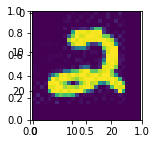

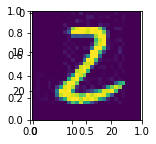

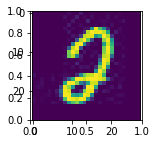

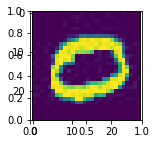

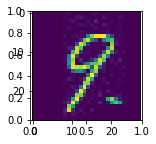

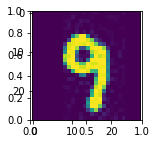

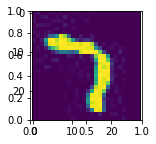

In [94]:
for x in img:
    i = 1
    fig, ax = plt.subplots(figsize=(2,2))
    x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    x = np.reshape(x, (28,28,1))
    ans = sess.run([output], feed_dict={input_ : [x], dropout : 0.0, bn_tensor : True})
    fig.add_subplot(1,1,1)
    plt.imshow(x)
    print("The Digit in the image Classified as : ",np.argmax(ans))

